## Analiza danych

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv('data/parsed_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             9598 non-null   int64  
 1   length                                 9598 non-null   object 
 2   discount                               9598 non-null   int64  
 3   user_id                                9598 non-null   int64  
 4   successful                             9598 non-null   bool   
 5   mean_price                             9598 non-null   float64
 6   median_of_price                        9598 non-null   float64
 7   min_rating                             9598 non-null   float64
 8   max_rating                             9598 non-null   float64
 9   mean_rating                            9598 non-null   float64
 10  sessions_so_far                        9598 non-null   int64  
 11  succ

In [43]:
num_of_rows = data.shape[0]
successful = data[data.successful == True]
unsuccessful = data[data.successful != True]
num_of_successful = len(successful)
num_of_unsuccessful = len(unsuccessful)

ratio = round(num_of_successful / num_of_unsuccessful, 2)
# stosunek sesji zakończonych zakupem do sesji pustych
ratio

0.3

In [44]:
# procent sesji zakończonych sukcesem
round(num_of_successful / (num_of_successful+num_of_unsuccessful), 2)

0.23

In [52]:
discounts = data.groupby('discount').count().reset_index('discount')
discounts

,discount,Unnamed: 0,length,user_id,successful,mean_price,median_of_price,min_rating,max_rating,mean_rating,...,cat_Tablety_i_akcesoria,cat_Telefony_i_akcesoria,cat_Telefony_komórkowe,cat_Telefony_stacjonarne,cat_Telewizory_i_akcesoria,cat_Video,cat_Zestawy_głośnomówiące,cat_Zestawy_słuchawkowe,city,gender
0,0,5665,5665,5665,5665,5665,5665,5665,5665,5665,...,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665
1,5,994,994,994,994,994,994,994,994,994,...,994,994,994,994,994,994,994,994,994,994
2,10,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
3,15,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017
4,20,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954


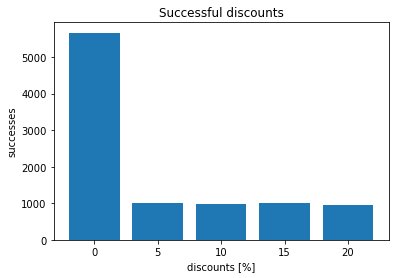

In [53]:
x_pos = np.arange(len(discounts['successful']))

plt.bar(x_pos, discounts['successful'])

plt.title('Successful discounts')
plt.xlabel('discounts [%]')
plt.ylabel('successes')
 
plt.xticks(x_pos, discounts['discount'])
 
plt.show()